## Image Processing Examples

In [0]:
# Download some image files
!wget 'https://live.staticflickr.com/4091/4994221690_d070e8a355_b_d.jpg'
!mv 4994221690_d070e8a355_b_d.jpg mug.jpg

!wget 'https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/01/bondi_beach.jpg'
!mv bondi_beach.jpg beach.jpg

!wget 'http://i.stack.imgur.com/SYxmp.jpg'
!mv SYxmp.jpg girl.jpg

from IPython.display import Image, display
display(Image('mug.jpg'))
display(Image('beach.jpg'))

In [0]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.patches as patches

DATA = Path('.')
IMAGE_MUG = DATA/'mug.jpg'
IMAGE_BEACH = DATA/'beach.jpg'
IMAGE_GIRL = DATA/'girl.jpg'

In [0]:
#------------------------------------------------------
# Plot an image on an existing figure and axes
#------------------------------------------------------
def plot_image (im, cmap=None):
  if (cmap is None):
    plt.imshow(im)
  else:
    plt.imshow(im, cmap)

#------------------------------------------------------
# Plot two images side-by-side for a before-after comparison
#------------------------------------------------------
def plot_image_compare (im1, im2, cmap1=None, cmap2=None):
  plt.figure(figsize=(10,4))

  plt.subplot(1,2,1)
  plot_image (im1, cmap1)
  plt.axis('off')
  plt.title('Original Image')

  plt.subplot(1,2,2)
  plot_image (im2, cmap2)
  plt.axis('off')
  plt.title('Grayscale Image')

  plt.tight_layout()
  plt.show()
  
#------------------------------------------------------
# Plot the histogram of greyscale values along with a threshold line
#------------------------------------------------------
def plot_hist_threshold (im_grey, thresh):
  im_pixels = im_grey.flatten()
  plt.hist(im_pixels,bins=50)
  plt.vlines(thresh, 0, 100000, linestyle='--')
  plt.ylim([0,50000])
  plt.title('Grayscale Histogram')  
  
#------------------------------------------------------
# Draw a bounding box on an image
#------------------------------------------------------
def bounding_box (ax, x, y, width, height):
  # Create a Rectangle patch
  rect = patches.Rectangle((x,y),width,height,linewidth=1,edgecolor='r',facecolor='none')

  # Add the patch to the Axes
  ax.add_patch(rect)

## Using Scipy-Image library

In [0]:
from skimage import io as skio
from skimage.color import rgb2gray
from skimage import exposure
from skimage import filters
from scipy import ndimage

#------------------------------------------------------
# Read an image
#------------------------------------------------------
def read_image (file):
  im = skio.imread(str(file))
  return (im)

#------------------------------------------------------
# Convert an image to greyscale
#------------------------------------------------------
def greyscale (im):
  im_grey = rgb2gray(im)
  return (im_grey)

#------------------------------------------------------
# Segment a greyscale image into foreground and background by calculating
# a separation threshold based on the histogram of pixel intensities
# Also use the threshold to produce a mask of the foreground and background
# Otsu's method, named after Nobuyuki Otsu is used to automatically perform clustering-based 
# image thresholding, or, the reduction of a graylevel image to a binary image. The 
# algorithm assumes that the image contains two classes of pixels following bi-modal 
# histogram (foreground pixels and background pixels), it then calculates the 
# optimum threshold separating the two classes so that their inter-class variance 
# is maximal. Otsu’s method exhibits relatively good performance if the histogram 
# can be assumed to have bimodal distribution and assumed to possess a deep and 
# sharp valley between two peaks
#------------------------------------------------------
def segment_foreback (im_grey):
  thresh = filters.threshold_otsu(im_grey)
  mask = np.where(im_grey > thresh, 1, 0)

  return (mask, thresh)

#------------------------------------------------------
# Get a list of all objects, along with separate masks for each object
# To identify individual objects in the image we separate the connected components
# where all the neighbouring pixels are connected.
# Compute all the separate connected components in the image and label each 
# individual component with a different pixel value ie. a different colour
#------------------------------------------------------
def get_objects_with_mask (im_mask):
  objects, num_objects = ndimage.label(synthetic_mask)
  
  # Make an array of masks, one for each object
  object_masks = []
  for object_idx in range(1, num_objects+1):
    obj_mask = np.where(objects == object_idx, 1, 0)
    object_masks.append(obj_mask)
    
  return (objects, num_objects, object_masks)

### Converting to greyscale

Original image shape: (1100, 762), Datatype: uint8
New image shape: (1100, 762)


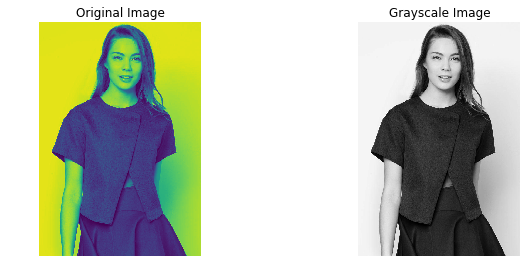

In [0]:
# Read the image into an array and print the image dimensions
# It has 3 dimensions, where the 3rd dimension is the RGB channel
im = read_image (IMAGE_GIRL)
print('Original image shape: {}, Datatype: {}'.format(im.shape, im.dtype))

# Convert it to a grey scale. It now has only 2 dimensions
im_gray = greyscale (im)
print('New image shape: {}'.format(im_gray.shape))

# Plot the original and greyscale images
plot_image_compare (im, im_gray, None, 'gray')

### Draw a bounding box on the image (with matplotlib, not scipy specific)

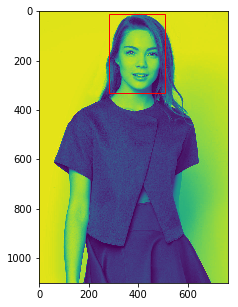

In [0]:
import matplotlib.patches as patches

# Create figure and axes
fig,ax = plt.subplots(1, figsize=(7,5))

# Display the image
ax.imshow(im)

# Draw a bounding box
bounding_box (ax, 280, 10, 230, 320)

plt.show()

### Segmenting into Foreground and Background

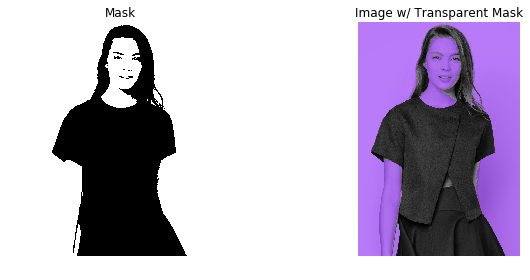

In [0]:
# Segment the image into foreground and background
mask, thresh_val = segment_foreback (im_gray)

plt.figure(figsize=(10,4))

# Plot the mask
plt.subplot(1,2,1)
plt.imshow(mask, cmap='gray', interpolation='nearest')
plt.title('Mask')
plt.axis('off')

# Create a "transparent" mask by blanking out all the white (ie. 0) pixels in the
# initial mask. Superimpose this mask in a different colour on the original image
plt.subplot(1,2,2)
mask_for_display = np.where(mask, mask, np.nan)
plt.imshow(im_gray, cmap='gray')
plt.imshow(mask_for_display, cmap='rainbow', alpha=0.5)
plt.axis('off')
plt.title('Image w/ Transparent Mask')

plt.tight_layout()
plt.show()

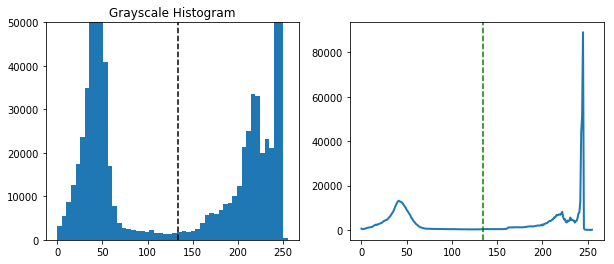

In [0]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plot_hist_threshold (im_gray, thresh_val)

plt.subplot(1,2,2)
# Plot the histogram based on the skimage tutorial using skimage.exposure
# Not sure why it looks different from the normal histogram on the left
hist, bins_center = exposure.histogram(im_gray)
plt.plot(bins_center, hist, lw=2)
plt.axvline(thresh_val, color='g', ls='--')

plt.show()

### Identifying individual objects

There are 28 separate objects detected.


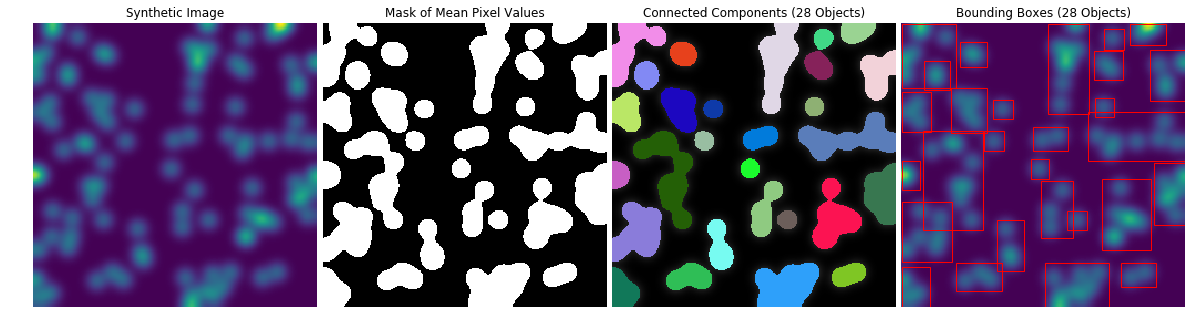

In [0]:
# Generate a synthetic image that contains several distinct blobs
def generate_image ():
  np.random.seed(1)
  n = 10
  l = 256
  im = np.zeros((l, l))
  points = l*np.random.random((2, n**2))
  im[(points[0]).astype(np.int), (points[1]).astype(np.int)] = 1
  im = ndimage.gaussian_filter(im, sigma=l/(4.*n))
  return (im)

# Plot bounding boxes for all the objects in the image
def object_boxes (ax, objects):
  for label_idx, (sliceY, sliceX) in enumerate(ndimage.find_objects(objects)):
    x, y = sliceX.start, sliceY.start
    width = sliceX.stop - sliceX.start
    height = sliceY.stop - sliceY.start
    bounding_box (ax, x, y, width, height)

# To identify individual objects in the image, generate a suitable sample image
synthetic_im = generate_image()
# Generate a mask using a threshold of the mean value
synthetic_mask = synthetic_im > synthetic_im.mean()

#labels, nlabels = ndimage.label(synthetic_mask)
labels, nlabels, _ = get_objects_with_mask (synthetic_mask)

print('There are {} separate objects detected.'.format(nlabels))

# Create figure and axes
fig, axes = plt.subplots(1, 4, figsize=(16,5))

# ------- Plot 1 - Original image --------
ax = axes[0]
ax.imshow(synthetic_im)
ax.set_title('Synthetic Image')
ax.axis('off')

# ------- Plot 2 - Mask ------- 
ax = axes[1]
ax.imshow(synthetic_mask, cmap=plt.cm.gray)
ax.set_title('Mask of Mean Pixel Values')
ax.axis('off')

# ------- Plot 3 - Objects based on Connected Components ------- 
ax = axes[2]
# Create a random colormap so that each label value gets a distinct colour
from matplotlib.colors import ListedColormap
rand_cmap = ListedColormap(np.random.rand(256,3))
# Create a transparent mask where non-labeled values are blanked out
labels_for_display = np.where(labels > 0, labels, np.nan)
ax.imshow(synthetic_im, cmap='gray')
ax.imshow(labels_for_display, cmap=rand_cmap)
ax.set_title('Connected Components ({} Objects)'.format(nlabels))
ax.axis('off')

# ------- Plot 4 - Bounding Boxes for all Objects -------
ax = axes[3]
ax.imshow(synthetic_im)
# Draw all the bounding boxes
object_boxes (ax, labels)
ax.set_title('Bounding Boxes ({} Objects)'.format(nlabels))
ax.axis('off')

plt.subplots_adjust(wspace=0.02, hspace=0.02, top=1, bottom=0, left=0, right=1)

plt.show()

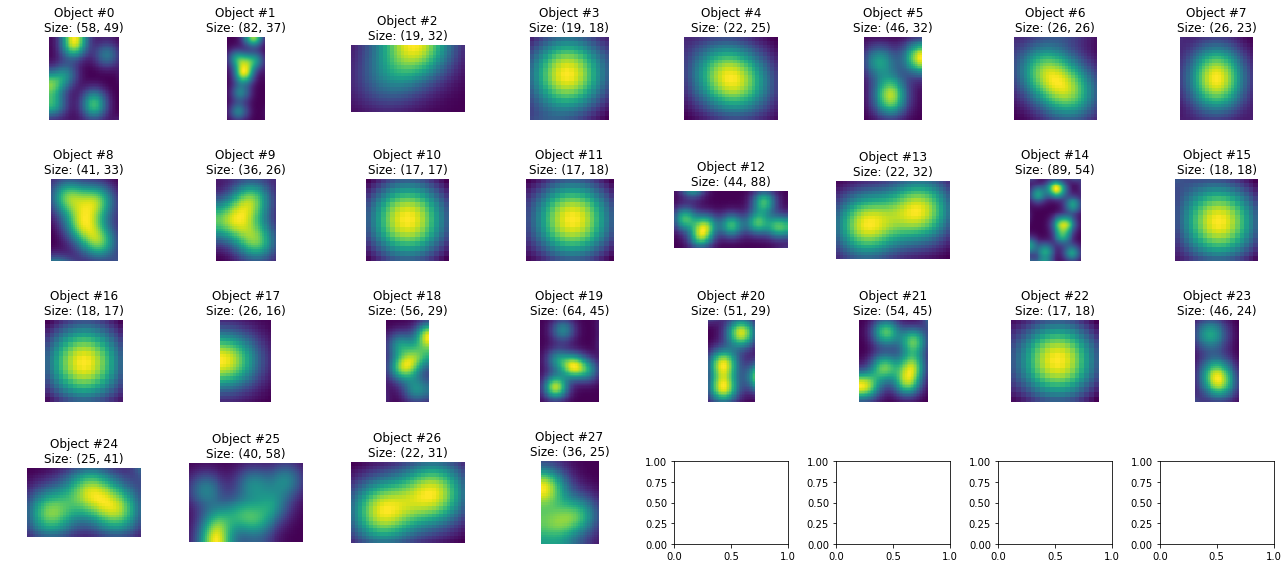

In [0]:
# Display a grid of each object, zoomed in
#-----------------------------------------------------------------------
num_rows, num_cols = 4, 8
fig,axes = plt.subplots(num_rows, num_cols, figsize=(18, 8))

for label_idx, label_coords in enumerate(ndimage.find_objects(labels)):
  # Get the slice of the image corresponding to this object
  cell = synthetic_im[label_coords]

  ax = axes[label_idx // num_cols, label_idx % num_cols]
  ax.imshow(cell)
  ax.set_title ('Object #{}\nSize: {}'.format(label_idx, cell.shape))
  #'Label #{}\nSize: {}'.format(ii+1, cell.shape)
  ax.axis('off')

#plt.subplots_adjust(wspace=0.02, hspace=0.15, top=1, bottom=0, left=0, right=1)
plt.tight_layout()
plt.show()

### Edge Detection

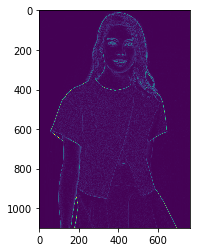

In [0]:
sobel = filters.sobel(im_gray)
plt.imshow(sobel)

### Gaussian Blurring

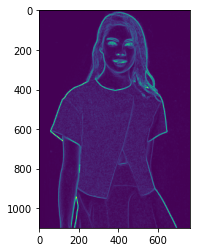

In [0]:
blurred = filters.gaussian(sobel, sigma=2.0)
plt.imshow(blurred)

### This is an example from the scipy tutorials. To extract the largest object. Need to understand it

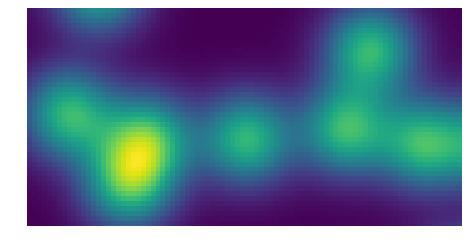

In [0]:

np.random.seed(1)
n = 10
l = 256
im = np.zeros((l, l))
points = l*np.random.random((2, n**2))
im[(points[0]).astype(np.int), (points[1]).astype(np.int)] = 1
im = ndimage.gaussian_filter(im, sigma=l/(4.*n))

mask = im > im.mean()

label_im, nb_labels = ndimage.label(mask)

# Find the largest connected component
sizes = ndimage.sum(mask, label_im, range(nb_labels + 1))
mask_size = sizes < 1000
remove_pixel = mask_size[label_im]
label_im[remove_pixel] = 0
labels = np.unique(label_im)
label_im = np.searchsorted(labels, label_im)

# Now that we have only one connected component, extract it's bounding box
slice_x, slice_y = ndimage.find_objects(label_im==4)[0]
roi = im[slice_x, slice_y]

# Original image
plt.figure(figsize=(8, 4))
plt.imshow(roi)
plt.axis('off')

plt.show()

## Using imageio library

In [0]:
import imageio

#------------------------------------------------------
# Read an image
#------------------------------------------------------
def read_image (file):
  im = imageio.imread(str(file))
  return (im)

## Using OpenCV library

In [0]:
import cv2

#------------------------------------------------------
# Read an image
# The image is read in the BGR colorspace. We have a third dimension as every 
# pixel is represented by it's B, G and R components. This is the default 
# colorspace in which images are read in OpenCV.
#------------------------------------------------------
def read_image (file):
  im = cv2.imread(str(file))
  return (im)

#------------------------------------------------------
# Convert an image to greyscale
# We reduced a dimension when we transformed from the BGR colorspace to grayscale. 
# This is because grayscale is a range of monochromatic shades from black to white. 
# Therefore, a grayscale image contains only shades of gray and no color (i.e it 
# primarily contains only black and white). Transforming the colorspace removes 
# all color information, leaving only the luminance of each pixel. Since digital 
# images are displayed using a combination of red, green, and blue (RGB) colors, 
# each pixel has three separate luminance values. Therefore, these three values 
# must be combined into a single value when removing color from an image. Luminance 
# can also be described as brightness or intensity, which can be measured on a 
# scale from black (zero intensity) to white (full intensity)
#------------------------------------------------------
def greyscale (im):
  im_grey = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
  return (im_grey)

#------------------------------------------------------
# Edge Detection using Sobel Filter
#------------------------------------------------------
def edge_detect_sobel (im_grey):
  #cv2.Sobel arguments - the image, output depth, order of derivative of x, order of derivative of y, kernel/filter matrix size
  sobelx = cv2.Sobel(im_grey,int(cv2.CV_64F),1,0,ksize=3) #ksize=3 means we'll be using the 3x3 Sobel filter
  sobely = cv2.Sobel(im_grey,int(cv2.CV_64F),0,1,ksize=3)
  sobel = np.sqrt(np.square(sobelx) + np.square(sobely))
  return (sobelx, sobely, sobel)

#------------------------------------------------------
# Edge Detection using Canny
#------------------------------------------------------
def edge_detect_canny (im_grey):
  canny = cv2.Canny(im_grey,100, 200)
  return (canny)

### Converting to greyscale

Original image shape: (1100, 762, 3), Datatype: uint8
New image shape: (1100, 762)


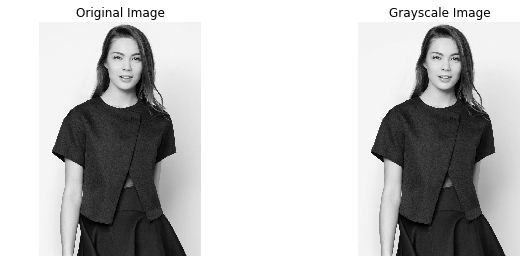

In [0]:
# Read the image into an array and print the image dimensions
# It has 3 dimensions, where the 3rd dimension is the RGB channel
im = read_image (IMAGE_GIRL)
print('Original image shape: {}, Datatype: {}'.format(im.shape, im.dtype))

# Convert it to a grey scale. It now has only 2 dimensions
im_gray = greyscale (im)
print('New image shape: {}'.format(im_gray.shape))

# Plot the original and greyscale images
plot_image_compare (im, im_gray, None, 'gray')

### Segmenting into Foreground and Background (TODO - convert to OpenCV)

In [0]:
# Segment the image into foreground and background
# TODO - Replace with OpenCV equivalent
# mask, thresh_val = segment_foreback (im_gray)

plt.figure(figsize=(10,4))

# Plot the mask
plt.subplot(1,2,1)
plt.imshow(mask, cmap='gray', interpolation='nearest')
plt.title('Mask')
plt.axis('off')

# Create a "transparent" mask by blanking out all the white (ie. 0) pixels in the
# initial mask. Superimpose this mask in a different colour on the original image
plt.subplot(1,2,2)
mask_for_display = np.where(mask, mask, np.nan)
plt.imshow(im_gray, cmap='gray')
plt.imshow(mask_for_display, cmap='rainbow', alpha=0.5)
plt.axis('off')
plt.title('Image w/ Transparent Mask')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distribution of intensity values (Zoomed In)')

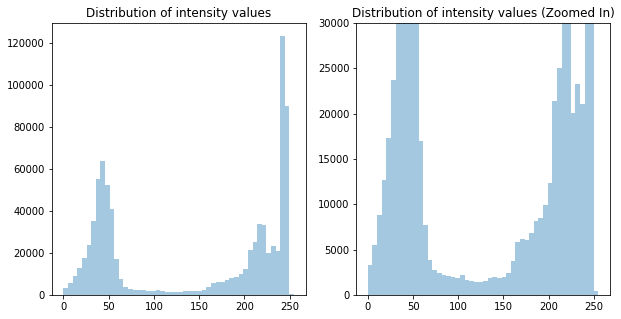

In [0]:
#Distribution of the intensity values of all the pixels
# TODO - make this into a function
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.distplot(im_gray.flatten(),kde=False)#This is to flatten the matrix and put the intensity values of all the pixels in one single row vector
plt.title('Distribution of intensity values')

#To zoom in on the distribution and see if there is more than one prominent peak 
plt.subplot(1,2,2)
sns.distplot(im_gray.flatten(),kde=False) 
plt.ylim(0,30000) 
plt.title('Distribution of intensity values (Zoomed In)')

### Edge Detection

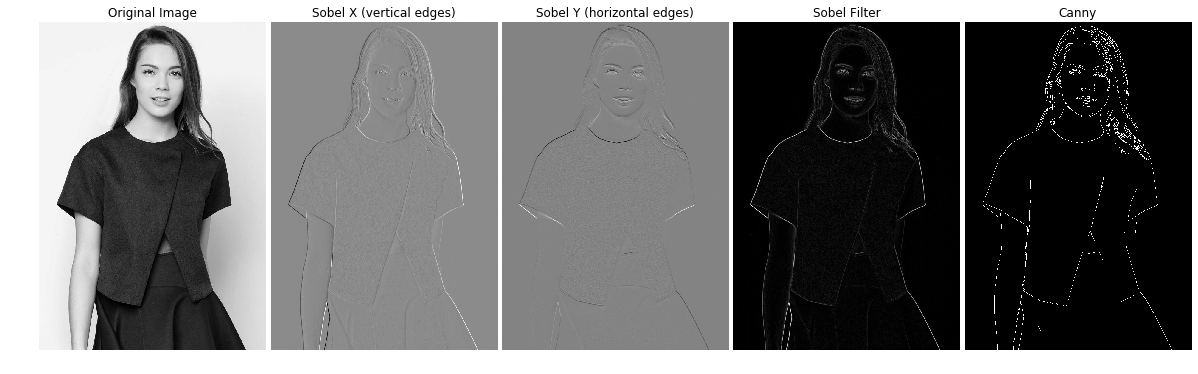

In [0]:
sobelx, sobely, sobel = edge_detect_sobel (im_gray)
canny = edge_detect_canny (im_gray)

# Create figure and axes
fig, axes = plt.subplots(1, 5, figsize=(16,5))

# ------- Plot 1 - Original image --------
ax = axes[0]
ax.imshow(im_gray, cmap='gray')
ax.set_title('Original Image')
ax.axis('off')

# ------- Plot 2 - Sobel X ------- 
ax = axes[1]
ax.imshow(sobelx,cmap='gray')
ax.set_title('Sobel X (vertical edges)')
ax.axis('off')

# ------- Plot 3 - Sobel Y ------- 
ax = axes[2]
ax.imshow(sobely,cmap='gray')
ax.set_title('Sobel Y (horizontal edges)')
ax.axis('off')

# ------- Plot 4 - Combined Sobel Filter -------
ax = axes[3]
ax.imshow(sobel,cmap='gray')
ax.set_title('Sobel Filter')
ax.axis('off')

# ------- Plot 5 - Canny Edge Detection -------
ax = axes[4]
ax.imshow(canny,cmap='gray')
ax.set_title('Canny')
ax.axis('off')

plt.subplots_adjust(wspace=0.02, hspace=0.02, top=1, bottom=0, left=0, right=1)

plt.show()

## Using Pillow (Python Image Library, formerly PIL)